In [1]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay


In [2]:
df = pd.read_csv('encoded_df.csv')

In [3]:
df.shape

(778, 20)

In [4]:
df = df.drop(df[df.home_results > 2].index)

In [5]:
print(df['home_results'].value_counts())

0    493
1    273
Name: home_results, dtype: int64


In [1]:
493+273

766

In [2]:
493/766

0.643603133159269

In [3]:
273/766

0.3563968668407311

In [6]:
df.shape

(766, 20)

In [7]:
df = df.drop(columns=['Winner', 'Pts', 'Loser', 'Pts.1', 'winners', 
                      'losers', 'win_rank', 'lose_rank', 'hours', 
                      'null', 'half', 'quart', 'three_quart'])

In [8]:
X = df.drop(columns=['home_results'])
y = df['home_results']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20, random_state=0)


In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [11]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [12]:
df.cov()

,Wk,home_rank,away_rank,home_team_code,away_team_code,home_results,day_code
Wk,13.356346,2.861923,-13.954839,-0.143825,4.276436,0.308266,-0.169866
home_rank,2.861923,1210.212570,160.820191,-116.168095,-60.319729,2.865032,-2.303026
away_rank,-13.954839,160.820191,943.144286,-44.453120,-121.846584,-3.022615,-1.721210
home_team_code,-0.143825,-116.168095,-44.453120,1485.428113,-33.275155,-1.069387,0.861421
away_team_code,4.276436,-60.319729,-121.846584,-33.275155,4177.218309,1.630613,1.152924
home_results,0.308266,2.865032,-3.022615,-1.069387,1.630613,0.229678,-0.016782
day_code,-0.169866,-2.303026,-1.721210,0.861421,1.152924,-0.016782,0.488923


https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [15]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(X)  # fit does nothing.
normalizer_x = transformer.transform(X)
X_train_norm = transformer.transform(X_train)
X_test_norm = transformer.transform(X_test)

In [16]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=10, random_state=0)
quantile_x = qt.fit_transform(X)
quantile_xtrain = qt.fit_transform(X_train)
quantile_xtest = qt.fit_transform(X_test)

In [18]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(X)
pt.lambdas_
transform_x = pt.transform(X)
transform_xtrain = pt.transform(X_train)
transform_xtest = pt.transform(X_test)

In [20]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
robust_x = transformer.transform(X)
robust_xtrain = transformer.transform(X_train)
robust_xtest = transformer.transform(X_test)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
scaler.data_max_
minmax_x = scaler.transform(X)
minmax_xtrain = scaler.transform(X_train)
minmax_xtest = scaler.transform(X_test)

In [24]:
from sklearn.preprocessing import MaxAbsScaler
transformer = MaxAbsScaler().fit(X)
maxabs_x = transformer.transform(X)
maxabs_xtrain = transformer.transform(X_train)
maxabs_xtest = transformer.transform(X_test)

---
Scalers:
    - maxabs_xtrain and maxabs_xtest
    - X_train_norm and X_test_norm
    - quantile_xtrain quantile_xtest
    - transform_xtrain and transform_xtest
    - robust_xtrain and robust_xtest
    - minmax_xtrain and minmax_xtest
    - X_train_ss and X_test_ss 

In [16]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=80)

In [17]:
clf.fit(X_train_norm, y_train)

LogisticRegression(max_iter=80)

In [18]:
predictions = clf.predict(X_test_norm)

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test, predictions)


array([[103,   3],
       [ 37,  11]])

basic:

    -array([[95,  4],
        - [41, 14]])
        
ss: 
    - array([[95,  4],
       - [41, 14]])
       
normalization:
    - array([[97,  2],
       - [42, 13]])
       
maxabs:
    - array([[95,  4],
       - [42, 13]])
       
minmax:
    - array([[95,  4],
       - [42, 13]])
       
robust: 
    - array([[95,  4],
       - [41, 14]])
       
transformer:
    - array([[95,  4],
       - [43, 12]])
       
quantile:
    - array([[95,  4],
       - [42, 13]])

In [31]:
from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('True Negative(TN)  = ', TN)
print('False Positive(FP) = ', FP)
print('False Negative(FN) = ', FN)


True Positive(TP)  =  12
True Negative(TN)  =  98
False Positive(FP) =  0
False Negative(FN) =  44


In [32]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))


Accuracy of the binary classifier = 0.714


In [33]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC(max_iter=100000)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [35]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model


,Accuracy,Precision,Recall
Logistic Regression,0.707792,0.214286,0.923077
Support Vector Machines,0.701299,0.178571,1.000000
Decision Trees,0.616883,0.482143,0.473684
Random Forest,0.694805,0.392857,0.628571
Naive Bayes,0.727273,0.339286,0.791667
K-Nearest Neighbor,0.707792,0.375000,0.677419


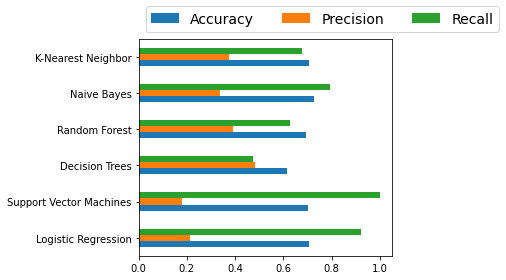

In [36]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()


In [41]:
from sklearn.metrics import log_loss

log_loss(y_test, predictions)

10.09255151782651

In [45]:
from pycaret.classification import *

In [96]:
# import sys
# sys.path

In [97]:
# /Users/ryantalbot/opt/anaconda3/envs/tf2/bin/python3 -m pip install -U scikit-learn

# pip install -U scikit-learn


In [88]:
dataset = df.copy()

In [89]:
data = dataset.sample(frac=0.95)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))



Data for Modeling: (729, 7)
Unseen Data For Predictions: (38, 7)


In [90]:
data

,Wk,home_rank,away_rank,home_team_code,away_team_code,home_results,day_code
185,4,17,99,12,193,0,5
324,6,99,99,5,44,0,5
633,11,99,99,37,164,1,5
732,13,99,22,105,39,1,5
453,8,99,25,37,86,0,5
...,...,...,...,...,...,...,...
217,4,16,99,78,194,0,5
365,6,6,99,100,11,0,5
183,4,99,99,9,207,0,5
387,7,99,99,15,27,1,5


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 185 to 102
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Wk              729 non-null    int64
 1   home_rank       729 non-null    int64
 2   away_rank       729 non-null    int64
 3   home_team_code  729 non-null    int64
 4   away_team_code  729 non-null    int64
 5   home_results    729 non-null    int64
 6   day_code        729 non-null    int64
dtypes: int64(7)
memory usage: 45.6 KB


In [124]:
exp_clf101=setup(data=data, target='home_results', fold_shuffle=True, 
                 imputation_type='iterative', session_id=123) 

,Description,Value
0,session_id,123
1,Target,home_results
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(729, 7)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'

In [125]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6745,0.6618,0.2663,0.5512,0.3568,0.1760,0.1964,0.0110
ridge,Ridge Classifier,0.6725,0.0000,0.2663,0.5541,0.3554,0.1730,0.1951,0.0060
catboost,CatBoost Classifier,0.6627,0.6496,0.2497,0.5412,0.3380,0.1490,0.1722,0.1720
lda,Linear Discriminant Analysis,0.6588,0.6512,0.2719,0.5096,0.3493,0.1495,0.1643,0.0060
xgboost,Extreme Gradient Boosting,0.6588,0.6329,0.4111,0.5051,0.4491,0.2084,0.2121,0.2070
lightgbm,Light Gradient Boosting Machine,0.6569,0.6194,0.3761,0.4962,0.4238,0.1901,0.1941,0.4650
gbc,Gradient Boosting Classifier,0.6529,0.6476,0.2912,0.5098,0.3658,0.1507,0.1649,0.0210
nb,Naive Bayes,0.6510,0.6127,0.1654,0.4971,0.2368,0.0852,0.1094,0.0070
ada,Ada Boost Classifier,0.6471,0.6339,0.3000,0.4772,0.3611,0.1399,0.1479,0.0190
rf,Random Forest Classifier,0.6392,0.6152,0.3242,0.4781,0.3796,0.1402,0.1485,0.0740


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6745,0.6618,0.2663,0.5512,0.3568,0.1760,0.1964,0.0110
ridge,Ridge Classifier,0.6725,0.0000,0.2663,0.5541,0.3554,0.1730,0.1951,0.0050
catboost,CatBoost Classifier,0.6627,0.6496,0.2497,0.5412,0.3380,0.1490,0.1722,0.1660
lda,Linear Discriminant Analysis,0.6588,0.6512,0.2719,0.5096,0.3493,0.1495,0.1643,0.0060
xgboost,Extreme Gradient Boosting,0.6588,0.6329,0.4111,0.5051,0.4491,0.2084,0.2121,0.2210
lightgbm,Light Gradient Boosting Machine,0.6569,0.6194,0.3761,0.4962,0.4238,0.1901,0.1941,0.4870
gbc,Gradient Boosting Classifier,0.6529,0.6476,0.2912,0.5098,0.3658,0.1507,0.1649,0.0170
nb,Naive Bayes,0.6510,0.6127,0.1654,0.4971,0.2368,0.0852,0.1094,0.0060
ada,Ada Boost Classifier,0.6471,0.6339,0.3000,0.4772,0.3611,0.1399,0.1479,0.0210
rf,Random Forest Classifier,0.6392,0.6152,0.3242,0.4781,0.3796,0.1402,0.1485,0.0580


In [127]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [128]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [129]:
df2 = df.copy()

In [130]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6863,0.6765,0.2941,0.5556,0.3846,0.2000,0.2182
1,0.6667,0.6263,0.1765,0.5000,0.2609,0.1053,0.1291
2,0.6667,0.6574,0.2353,0.5000,0.3200,0.1356,0.1525
3,0.6471,0.5623,0.2353,0.4444,0.3077,0.1000,0.1091
4,0.6078,0.4848,0.1667,0.3750,0.2308,0.0173,0.0199
5,0.6863,0.7542,0.2778,0.6250,0.3846,0.2139,0.2456
6,0.6275,0.6852,0.1667,0.4286,0.2400,0.0528,0.0631
7,0.7255,0.6902,0.3333,0.7500,0.4615,0.3121,0.3584
8,0.7059,0.8165,0.3333,0.6667,0.4444,0.2735,0.3039
9,0.7255,0.6650,0.4444,0.6667,0.5333,0.3497,0.3642


In [131]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6863,0.6799,0.2941,0.5556,0.3846,0.2000,0.2182
1,0.6667,0.6055,0.1765,0.5000,0.2609,0.1053,0.1291
2,0.6667,0.6419,0.2353,0.5000,0.3200,0.1356,0.1525
3,0.5882,0.5519,0.2353,0.3333,0.2759,0.0000,0.0000
4,0.6078,0.4949,0.1667,0.3750,0.2308,0.0173,0.0199
5,0.6471,0.7458,0.3333,0.5000,0.4000,0.1639,0.1707
6,0.6275,0.6801,0.1667,0.4286,0.2400,0.0528,0.0631
7,0.7255,0.6919,0.3333,0.7500,0.4615,0.3121,0.3584
8,0.7059,0.8215,0.3333,0.6667,0.4444,0.2735,0.3039
9,0.7255,0.6633,0.5000,0.6429,0.5625,0.3670,0.3732


In [132]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_lr)

LogisticRegression(C=4.432, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


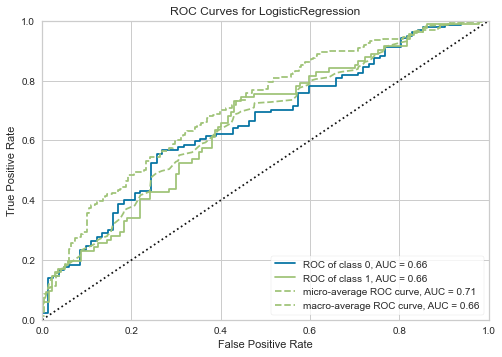

In [133]:
plot_model(tuned_lr, plot = 'auc')

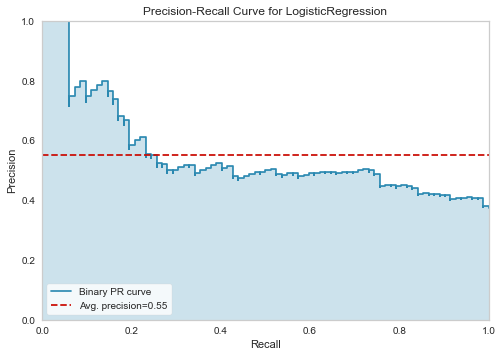

In [134]:
plot_model(tuned_lr, plot = 'pr')

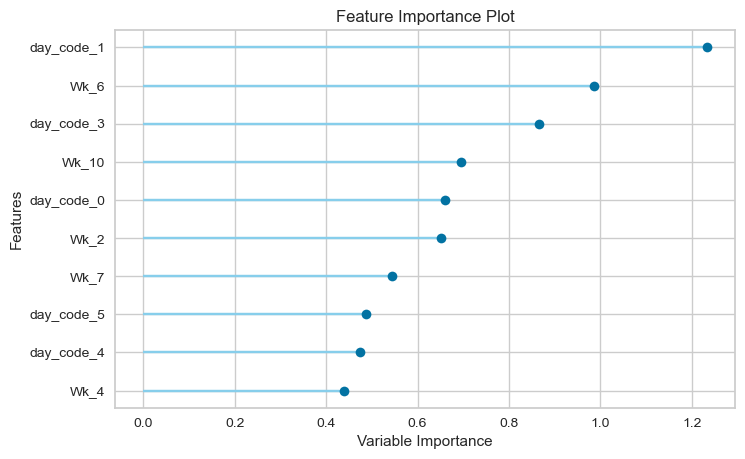

In [135]:
plot_model(tuned_lr, plot='feature')

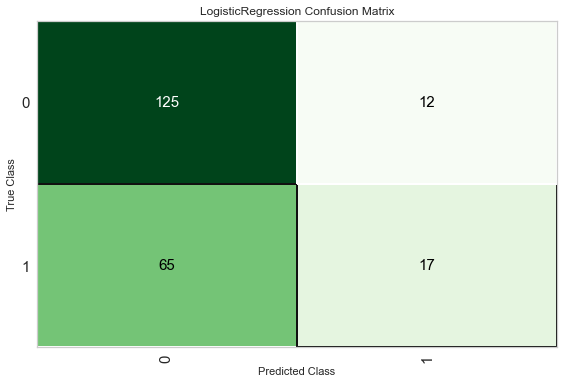

In [136]:
plot_model(tuned_lr, plot = 'confusion_matrix')

In [137]:
evaluate_model(tuned_lr)

,Parameters
C,4.432
class_weight,{}
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


In [138]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6484,0.6572,0.2073,0.5862,0.3063,0.1376,0.1710


In [139]:
final_rf = finalize_model(tuned_lr)

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.1.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.1.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.1.2 when usi

In [140]:
#Final Random Forest model parameters for deployment
print(final_rf)

LogisticRegression(C=4.432, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
